In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

The original data file didnot contain column name. Column names are manually added according to the dataset's documentation.

In [8]:
cols = ['symboling',
           'normalized-losses',
           'make',
           'fuel-type',
           'aspiration', 
           'num-of-doors',
           'body-style',
           'drive-wheels', 
           'engine-location', 
           'wheel-base',
           'length',
           'width',
           'height',
           'curb-weight',
           'engine-type', 
           'num-of-cylinders',
           'engine-size',
           'fuel-system',
           'bore',
           'stroke',
           'compression-ratio',
           'horsepower', 
           'peak-rpm',
           'city-mpg', 
           'highway-mpg', 
           'price']
cars = pd.read_csv('imports-85.data',header=None, names=cols)
print(cars.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

Based on the above description, numeric columns are slected to perform model predictions. The target column is price.

In [9]:
num_cols = ['symboling',
           'normalized-losses', 
           'wheel-base',
           'length',
           'width',
           'height',
           'curb-weight',
           'engine-size',
           'bore',
           'stroke',
           'compression-ratio',
           'horsepower', 
           'peak-rpm',
           'city-mpg', 
           'highway-mpg', 
           'price']
cars = cars.replace('?',np.nan)
cars = cars[num_cols].astype('float')
print(cars.describe())


        symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000 

We cannot have any missing values for predictive modeling. I removed normalized-losses column as it contains a large number of missing values. I drop other rows which have missing values. For the rest of the comlumns, I normalize the columns so all values range from 0 to 1.

In [10]:
print('%i out of %i rows have a missing value for the normalized-losses column'\
      %(cars['normalized-losses'].isnull().sum(),cars.shape[0]))

41 out of 205 rows have a missing value for the normalized-losses column


In [11]:
cars = cars.drop(['normalized-losses'],axis=1)

In [12]:
cars = cars.dropna()

In [15]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(cars)
cars_norm = pd.DataFrame(scaler.transform(cars), columns=num_cols)
print(cars_norm.head())

   symboling  wheel-base    length     width    height  curb-weight  \
0        1.0    0.058309  0.413433  0.324786  0.083333     0.411171   
1        1.0    0.058309  0.413433  0.324786  0.083333     0.411171   
2        0.6    0.230321  0.449254  0.444444  0.383333     0.517843   
3        0.8    0.384840  0.529851  0.504274  0.541667     0.329325   
4        0.8    0.373178  0.529851  0.521368  0.541667     0.518231   

   engine-size      bore    stroke  compression-ratio  horsepower  peak-rpm  \
0     0.260377  0.664286  0.290476             0.1250    0.294393  0.346939   
1     0.260377  0.664286  0.290476             0.1250    0.294393  0.346939   
2     0.343396  0.100000  0.666667             0.1250    0.495327  0.346939   
3     0.181132  0.464286  0.633333             0.1875    0.252336  0.551020   
4     0.283019  0.464286  0.633333             0.0625    0.313084  0.551020   

   city-mpg  highway-mpg     price  
0  0.222222     0.289474  0.207959  
1  0.222222     0.289474

The function encapsulates training and simple validation process. First split the data set into a training and test set. Then it instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set. Finally, it calculates and returns the RMSE.

In [20]:
def knn_train_test(features, target, df, k=5):
    np.random.seed(42)
    df = df.loc[np.random.permutation(df.shape[0])]
    n = df.shape[0]
    train = df.iloc[:n*2//3]
    test = df.iloc[n*2//3:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[features], train[target])
    predictions = knn.predict(test[features])
    rmses = (mean_squared_error(test[target],predictions))**(1/2)
    return rmses

First, let's start with univariate k-nearest neighbors models  which use one feature as the predictor at a time and generate a list of rmse corresponding to each feature/predictor.

In [24]:
features = ['symboling',
           'wheel-base',
           'length',
           'width',
           'height',
           'curb-weight',
           'engine-size',
           'bore',
           'stroke',
           'compression-ratio',
           'horsepower', 
           'peak-rpm',
           'city-mpg', 
           'highway-mpg']
univ_rmse = []
for i in features:
    univ_rmse.append(knn_train_test([i],'price',cars_norm))
feature_rmse = {'feature': np.asarray(features),
        'rmse': np.asarray(univ_rmse)}
feature_rmse = pd.DataFrame(feature_rmse)
print(feature_rmse.sort_values('rmse'))

              feature      rmse
6         engine-size  0.077768
10         horsepower  0.088564
12           city-mpg  0.104217
13        highway-mpg  0.104610
3               width  0.109489
5         curb-weight  0.121540
8              stroke  0.140126
7                bore  0.143565
9   compression-ratio  0.147417
11           peak-rpm  0.153675
4              height  0.165747
1          wheel-base  0.168684
2              length  0.171911
0           symboling  0.249253


For each feature, create, train, and test a univariate model using the following k values (1,3,5,7,9) and visualize the rmse using a scatter plot

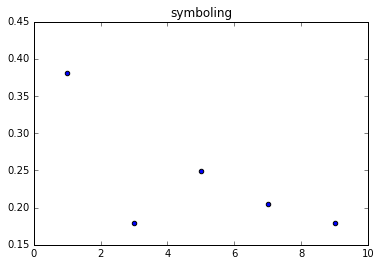

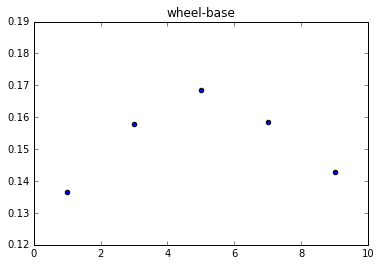

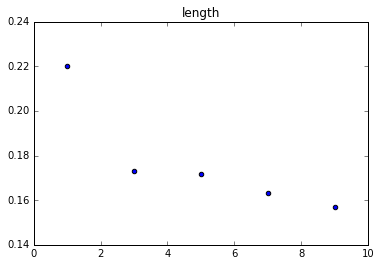

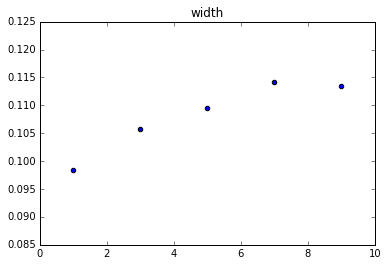

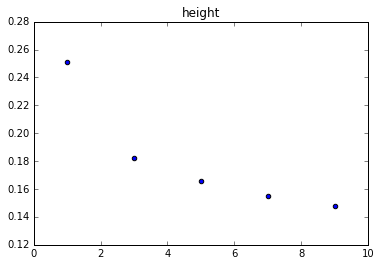

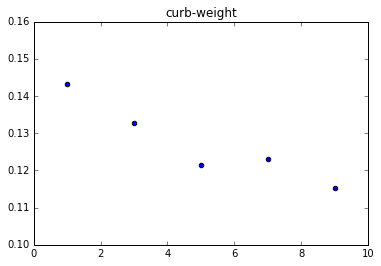

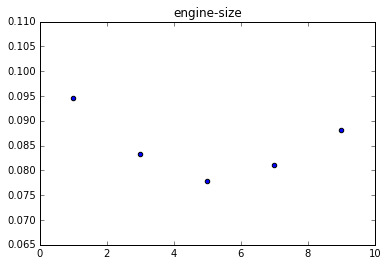

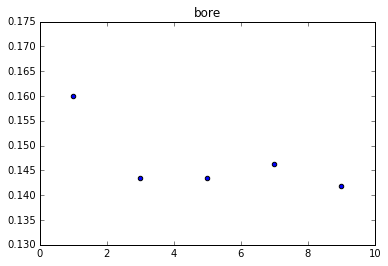

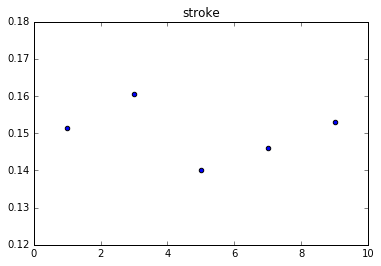

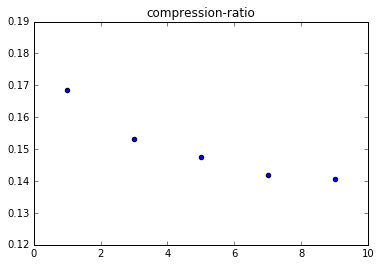

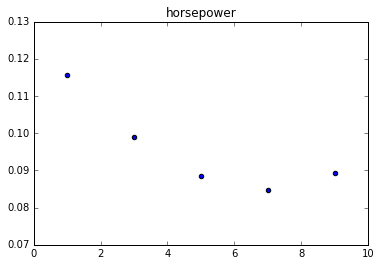

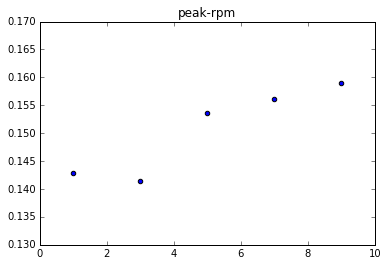

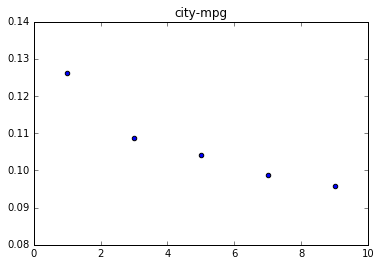

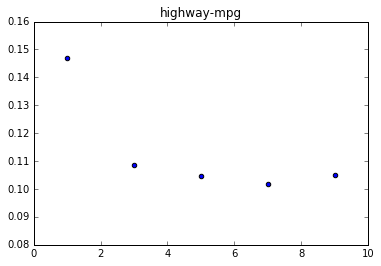

In [22]:
univ_rmse = {}
for i in features:
    for k in [1,3,5,7,9]:
        if i in univ_rmse:
            univ_rmse[i].append(knn_train_test([i],'price',cars_norm,k))
        else:
            univ_rmse[i] = [knn_train_test([i],'price',cars_norm,k)]
    plt.scatter([1,3,5,7,9], univ_rmse[i])
    plt.title(i)
    plt.show()
    

Next, I create, train and test the predictive model using all columns and best 2 features, 3 features, 4 features, 5 features from the previous univariate modeling results.


In [27]:
all_feature = knn_train_test(features, 'price',cars_norm)
top_five = ['engine-size','horsepower','city-mpg','highway-mpg','width']
two_feature = knn_train_test(top_five[:2],'price',cars_norm)
three_feature = knn_train_test(top_five[:3], 'price',cars_norm)
four_feature = knn_train_test(top_five[:4], 'price',cars_norm)
five_feature = knn_train_test(top_five,'price',cars_norm)
print('all features: ', all_feature)
print(top_five[:2], ': ', two_feature)
print(top_five[:3], ': ', three_feature)
print(top_five[:4], ': ', four_feature)
print(top_five[:5], ': ', five_feature)

all features:  0.0853471610718
['engine-size', 'horsepower'] :  0.0725297907145
['engine-size', 'horsepower', 'city-mpg'] :  0.0671916265477
['engine-size', 'horsepower', 'city-mpg', 'highway-mpg'] :  0.0729801150577
['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'width'] :  0.0788838378601


select the top 3 models from the above and vary the k value from 1 to 25 and examine the resulting RMSE values.

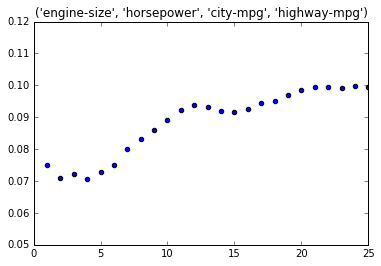

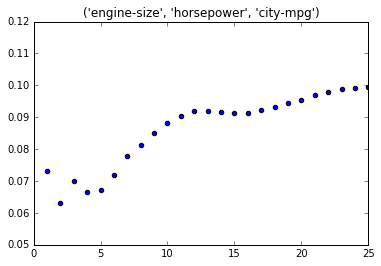

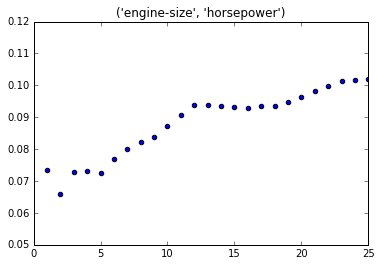

In [32]:
models_rmse = {tuple(top_five[:3]):[], \
               tuple(top_five[:2]):[], \
               tuple(top_five[:4]):[]}

for key in models_rmse:
    for k in np.arange(1, 26):
        models_rmse[key].append(knn_train_test(list(key),'price',cars_norm, k))
    plt.scatter(np.arange(1,26), models_rmse[key])
    plt.title(key)
    plt.xlim(0,25)
    plt.show()

The optimal k value for the above 3 models is 2. And more predictors generate more stable trend in the plot.